In [130]:
# wrong first algo attempt
# igraph's contraction has a relabeling bug in the C++ to python port...

# step 1: remove all vertices with a single neighbor

# contraction_mapping = {}
# contraction_mapping_list = []
# for v_id in range(num_vertices):
#     if g.degree(v_id) == 1:
#         neighbor = g.neighbors(v_id)[0]
#         print(v_id, "neighbors", neighbor)
#         contraction_mapping[v_id] = neighbor
#         contraction_mapping_list.append(neighbor)
#     else:
#         contraction_mapping[v_id] = v_id
#         contraction_mapping_list.append(v_id)

# g.contract_vertices(contraction_mapping_list)
# contraction_mapping_list

In [127]:
import networkx as nx
maximum_elements = list(G.nodes)

def is_maximal_node(G, n_max):
    n_max_neigh = set(G.neighbors(n_max)).union({n_max})
    for n in G:
        n_neigh = set(G.neighbors(n)).union({n})

        if n_max_neigh < n_neigh:
            return False
    return True
 
    
def colormap(G):
    colors = []
    for n_max in G:
        if is_maximal_node(G, n_max):
            colors.append("pink")
        else:
            colors.append("cyan")
    return colors


def gen_labels(G):
    labels = {}
    for n in G:
        name_part = str(n) + "\n"
        neighs = set(G.neighbors(n)).union({n})
        neighs = list(neighs)
        neighs = sorted(neighs)
        neighs = map(str, neighs)
        neigh_part = "".join(neighs)

        labels[n] = name_part + neigh_part
    return labels

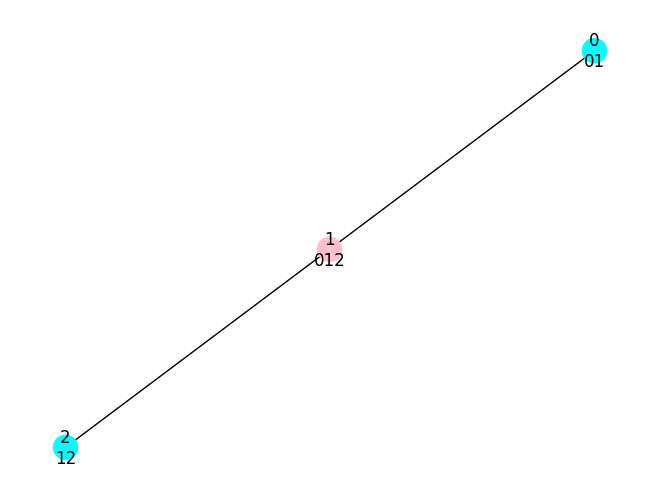

In [128]:
# easy graph
G = nx.Graph()
edges = [(0, 1), (1, 2)]
G.add_edges_from(edges)
labels = gen_labels(G)
colors = colormap(G)
nx.draw(G, with_labels=True, labels=labels, node_color=colors)

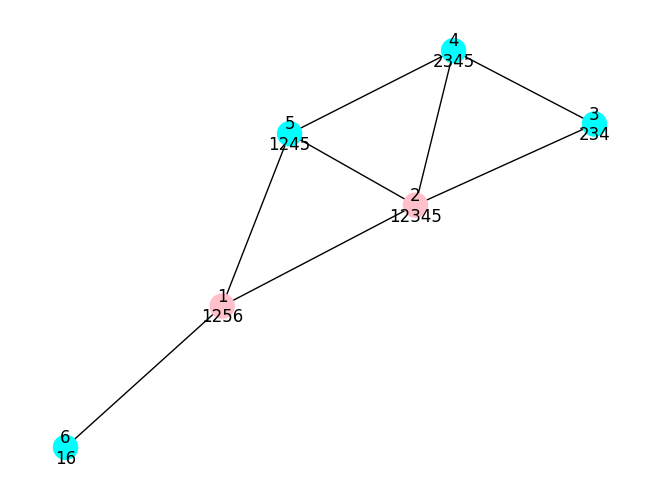

In [129]:
# graph from original counterexample
G = nx.Graph()
edges = [(1, 2), (1, 5), (2, 5), (2, 4), (2, 3), (3, 4), (4, 5), (1,6)]
G.add_edges_from(edges)
labels = gen_labels(G)
colors = colormap(G)
nx.draw(G, with_labels=True, labels=labels, node_color=colors)

In [132]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw arrowheads with